# Análise exploratória de suicídios no Brasil entre 1985 -2015

O objetivo da análise exploratória foi avaliar um dataset com dados de suicídios ocorridos em diversos países. A análise teve o Brasil como país alvo, a fim de levantar idéias que possam ser úteis para prevenção de suicídios.

## Descrição dos dados

O dataset e as fontes dos dados podem ser adquiridos pelo link abaixo:

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016



## Importantdo bibliotecas

In [1]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Importar os dados para um DataFrame
dados = pd.read_csv('master.csv')
#Visualizar os dados
dados.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
#Buscando informações sobre o dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Estatísticas descritivas do conjunto de dados:

In [4]:
#Estatísticas descritivas
dados.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Avaliando os dados de todos os países:

In [5]:
#Verificando quais são os países incluidos no dataset
dados['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [6]:
#Agrupando os valores por ano e a média de suicídios por 100k/hab(homens e mulheres)com duas casas decimais
mundo= pd.DataFrame(dados.groupby('year')['suicides/100k pop'].mean().round(2))
# Eliminando a linha de 2016
mundo.drop(2016, inplace=True)
#Visualizando o DataFrame
mundo

,suicides/100k pop
year,
1985,11.83
1986,11.42
1987,11.64
1988,12.71
1989,12.88
1990,12.86
1991,13.44
1992,13.50
1993,13.83


### Análise gráfica

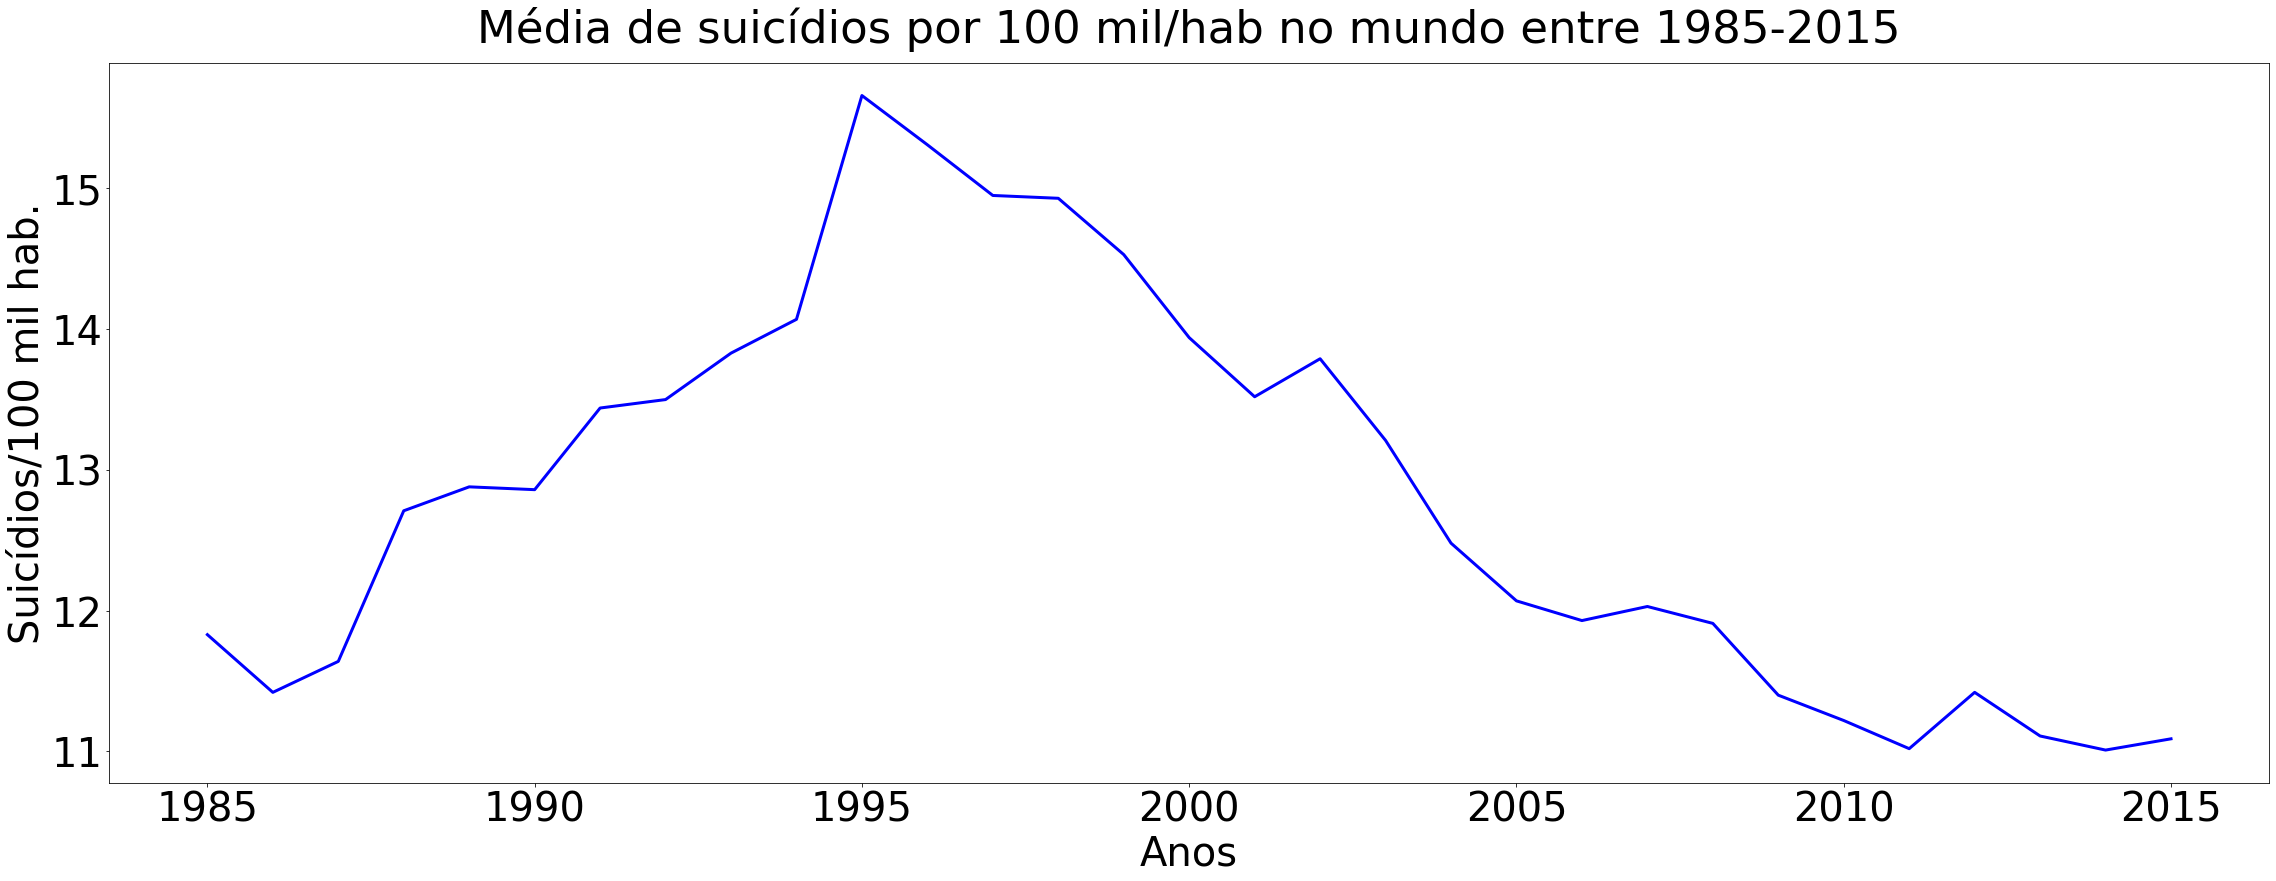

In [7]:
#Estabelecendo o tamanho do gráfico
fig=plt.figure(figsize=(30,10))
eixo = fig.add_axes([0,0,1,1])
#Criando o gráfico de número de suicidios por ano na cor azul e legenda
eixo.plot(mundo,color='b',label='Suicídios',linewidth=3)
#Colocando título do gráfico e escolhendo o tamanho da fonte
eixo.set_title('Média de suicídios por 100 mil/hab no mundo entre 1985-2015', fontsize=45, pad=20)
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Anos', fontsize=40)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
eixo.set_ylabel('Suicídios/100 mil hab.', fontsize=40)
#Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 40)

Os dados da média de suicídios por 100.000 habitantes dos países avaliados, mostra um declínio a partir do ano de 1996 e se mantendo até 2011. A partir de 2012 a média de suicídios dos países avaliados ficou em 11.15 pessoas por 100.000 habitantes até o ano de 2015.    

### Selecionando dados do Brasil:

In [8]:
#Selecionando os dados somente do Brasil
selecao = dados['country'] == 'Brazil'
#Criando um DataFrame com os dados selecionandos
bras = dados[selecao]
#Visualizando as 5 primeiras linhas do dataset
bras.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [9]:
#Criando um DataFrame da média de suicídios por 100.000 habitates(homens e mulheres) que ocorreram por ano
brasil= pd.DataFrame(bras.groupby('year')['suicides/100k pop'].mean().round(2))
#Visualizar o DataFrame
brasil.head()

,suicides/100k pop
year,
1985,4.93
1986,4.76
1987,5.84
1988,5.45
1989,5.34


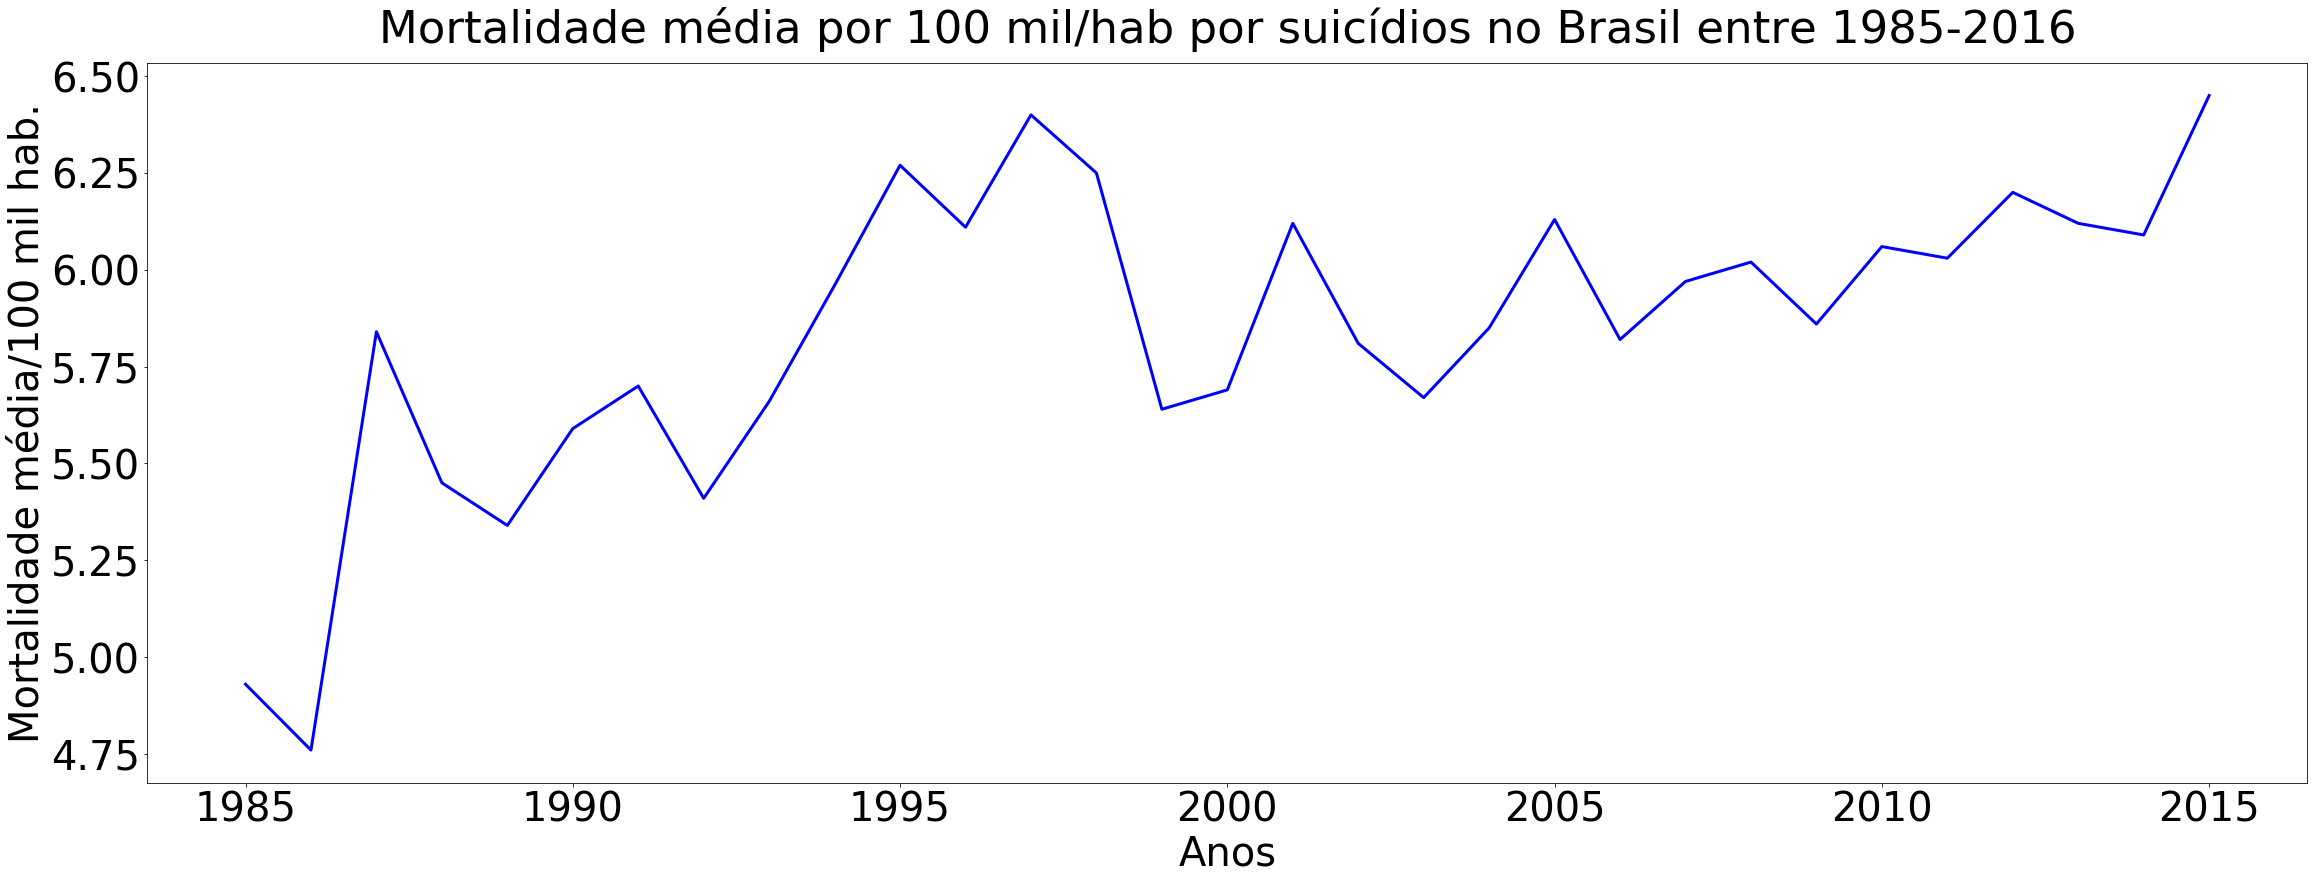

In [10]:
#Estabelecendo o tamanho do gráfico
fig=plt.figure(figsize=(30,10))
eixo = fig.add_axes([0,0,1,1])
#Criando o gráfico de número de suicidios por dia na cor azul e legenda
eixo.plot(brasil,color='b',label='Suicídios',linewidth=3)
#Colocando título do gráfico e escolhendo o tamanho da fonte
eixo.set_title('Mortalidade média por 100 mil/hab por suicídios no Brasil entre 1985-2016', fontsize=45, pad=20)
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Anos', fontsize=40)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
eixo.set_ylabel('Mortalidade média/100 mil hab.', fontsize=40)
#Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 40)

Como mostra o gráfico acima, houve um aumento na média de suicídios por 100.000 habitantes no Brasil entre os anos de 1985 a 2015. A média saiu de 5 suicídios por 100.000/hab. para 6.5 por 100.000/hab. durante o período avaliado. É difícil levantar causas para esse aumento visto que o suicídio pode ser cometido por diversos fatores. Por isso, campanhas como o Setembro Amarelo que alertam sobre o problema e trabalham na sua prevenção são extremamente importantes.

### Analisando os suicídios por faixa etária:

In [11]:
#Média do número de suicídios por faixa etária/ano
idade_n = pd.crosstab(bras['year'],bras['age'],aggfunc='mean',values=bras['suicides_no']).round(2)
#Resentando o index
idade_n.reset_index(inplace=True)
#Visualizando o DataFrame
idade_n.head()

age,year,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,1985,470.5,530.0,653.5,38.0,341.5,80.5
1,1986,508.0,505.5,651.0,31.0,372.0,68.0
2,1987,502.0,565.5,724.5,33.5,422.0,88.5
3,1988,472.0,557.5,724.0,30.0,356.0,93.5
4,1989,491.5,569.0,692.5,31.5,354.5,92.5


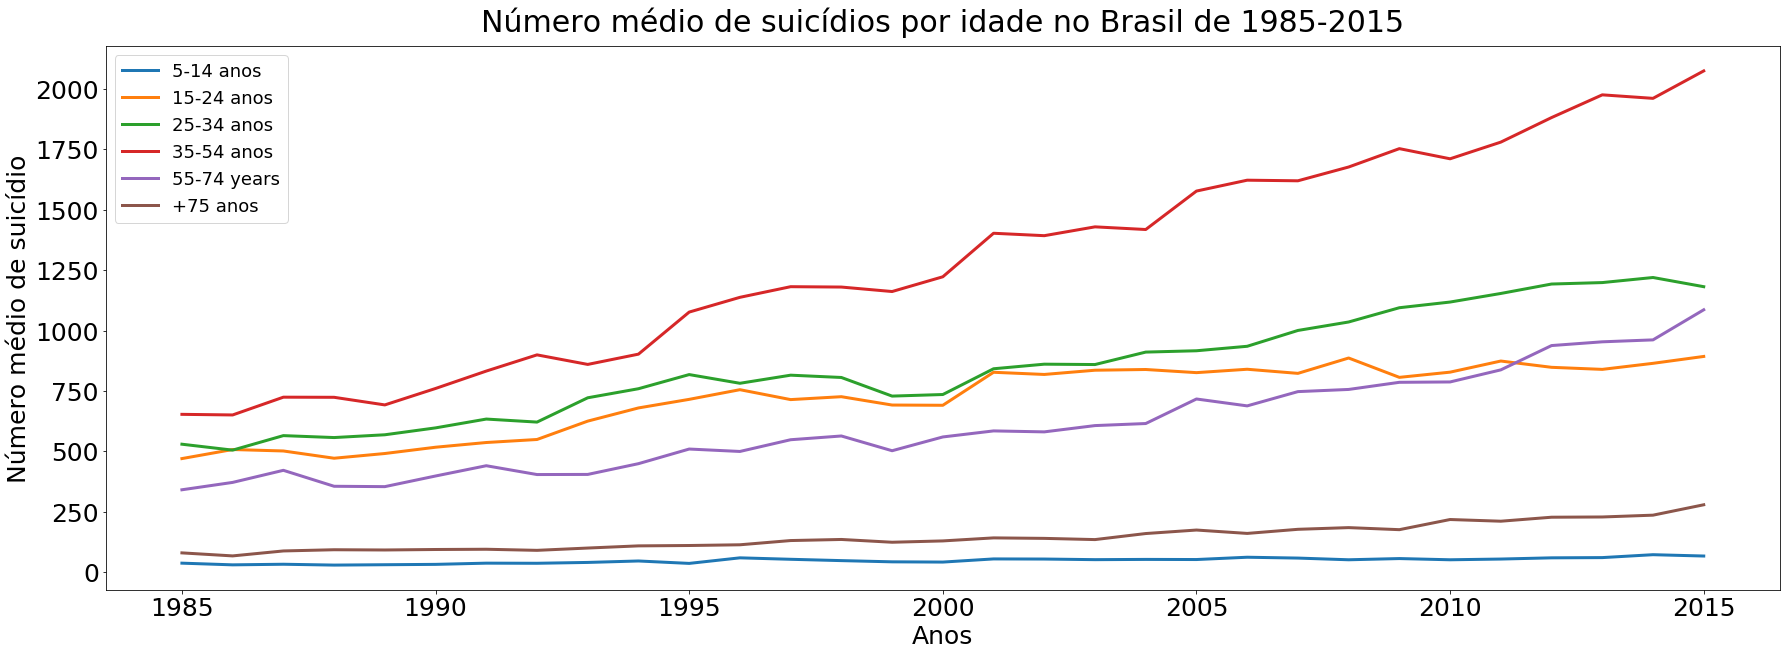

In [12]:
#Criando o gráfico do total de óbitos por idade com a biblioteca seaborn
ax=sns.lineplot(x='year', y='5-14 years',data=idade_n,linewidth=3)
ax=sns.lineplot(x='year', y='15-24 years',data=idade_n,linewidth=3)
ax=sns.lineplot(x='year', y='25-34 years',data=idade_n,linewidth=3)
ax=sns.lineplot(x='year', y='35-54 years',data=idade_n,linewidth=3)
ax=sns.lineplot(x='year', y='55-74 years',data=idade_n,linewidth=3)
ax=sns.lineplot(x='year', y='75+ years',data=idade_n,linewidth=3)
#Definindo o tamanho da figura
ax.figure.set_size_inches(30,10)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Número médio de suicídios por idade no Brasil de 1985-2015', fontsize=30, pad=15)
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel('Anos',fontsize=25)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel('Número médio de suicídio',fontsize=25)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(labelsize = 25)
#Legenda
ax.legend(['5-14 anos','15-24 anos','25-34 anos','35-54 anos','55-74 years','+75 anos'],fontsize=18,loc='best')

Como pode ser visto no gráfico acima, a faixa etária com maior número médio de suicídios durante todo período foi a de 35-54 anos. Entretanto, como esse dado não leva em consideração o tamanho da população de cada faixa etária (números absolutos), não se pode realizar uma comparação temporal entre as faixas etárias. Por exemplo, os valores mais altos encontrados na faixa etária 35-54 anos podem ter sido resultado da população dessa faixa etária ser maior do que nas outras faixas etárias. Portanto, é necessário avaliar os valores da variável de suicídios por 100.000 habitantes (suicides/100k pop), pois esta leva em consideração o tamanho populacional e poderíamos fazer uma comparação temporal entre as faixas etárias.

### Analisando suicídio por 100k/hab e faixa etária:

In [13]:
#Média do número de suicídios por 100.000 habitates por faixa etária/ano
idade = pd.crosstab(bras['year'],bras['age'],aggfunc='mean',values=bras['suicides/100k pop']).round(2)
#Resentando o índice
idade.reset_index(inplace=True)
#Visualizando o DataFrame
idade.head()

age,year,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,1985,3.41,4.92,5.43,0.24,6.30,9.30
1,1986,3.79,5.02,5.17,0.20,6.62,7.78
2,1987,3.56,5.00,5.62,0.20,7.94,12.74
3,1988,3.31,4.80,5.42,0.18,6.52,12.45
4,1989,3.42,4.77,5.02,0.18,6.34,12.28


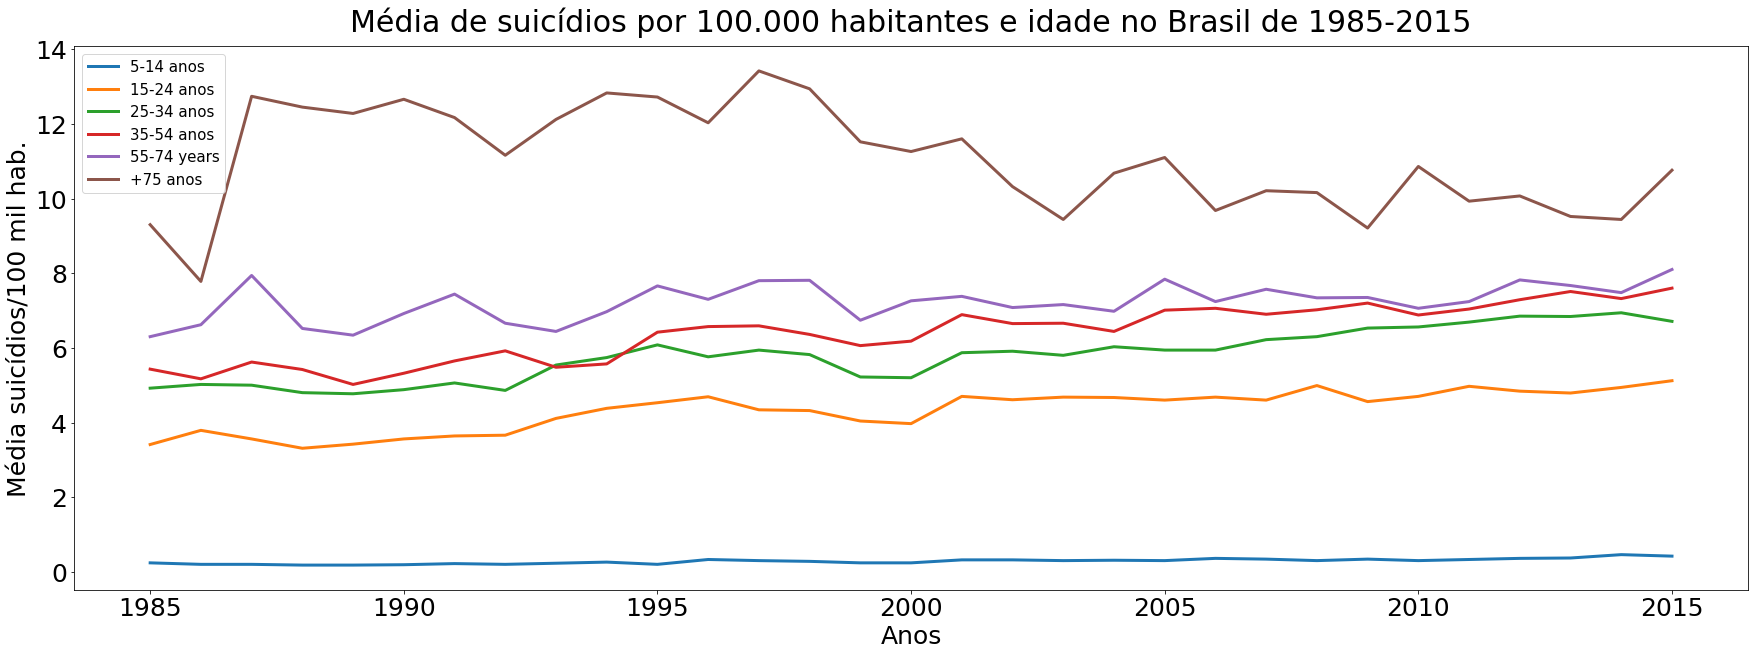

In [14]:
#Criando o gráfico do total de óbitos por idade com a biblioteca seaborn
ax=sns.lineplot(x='year', y='5-14 years',data=idade,linewidth=3)
ax=sns.lineplot(x='year', y='15-24 years',data=idade,linewidth=3)
ax=sns.lineplot(x='year', y='25-34 years',data=idade,linewidth=3)
ax=sns.lineplot(x='year', y='35-54 years',data=idade,linewidth=3)
ax=sns.lineplot(x='year', y='55-74 years',data=idade,linewidth=3)
ax=sns.lineplot(x='year', y='75+ years',data=idade,linewidth=3)
#Definindo o tamanho da figura
ax.figure.set_size_inches(30,10)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Média de suicídios por 100.000 habitantes e idade no Brasil de 1985-2015', fontsize=30, pad=15)
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel('Anos',fontsize=25)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel('Média suicídios/100 mil hab.',fontsize=25)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(labelsize = 25)
#Legenda
ax.legend(['5-14 anos','15-24 anos','25-34 anos','35-54 anos','55-74 years','+75 anos'],fontsize=15,loc='best')

Levando em consideração o tamanho populacional de cada faixa etária, o gráfico muda. A faixa etária com maior média por 100k/habitantes foi a de pessoas com mais de 75 anos, seguida de pessoas com 55-74 anos. Outro dado que chama atenção, é que a medida que aumenta a faixa etária aumentou a média de suicídios por 100.000 habitantes. Somente durante um curto período (1993 -1994), que a faixa etária de 25-34 anos teve uma média superior a da faixa de 35-54 anos. Logo, é possível que o fator idade  possa ter influência sobre óbitos por suicídios, entretamto necessita de uma análise mais apurada para se confirmar isso.

### Análise dos suicídios por sexo:

In [15]:
#Média do número de suicídios por 100.000 habitates por faixa etária/ano
sexo = pd.crosstab(bras['year'],bras['sex'],aggfunc='mean',values=bras['suicides/100k pop']).round(2)
#Resentando o índice
sexo.reset_index(inplace=True)
#Visualizando o índice
sexo.head()

sex,year,female,male
0,1985,2.18,7.68
1,1986,2.23,7.30
2,1987,2.22,9.47
3,1988,2.46,8.44
4,1989,2.17,8.50


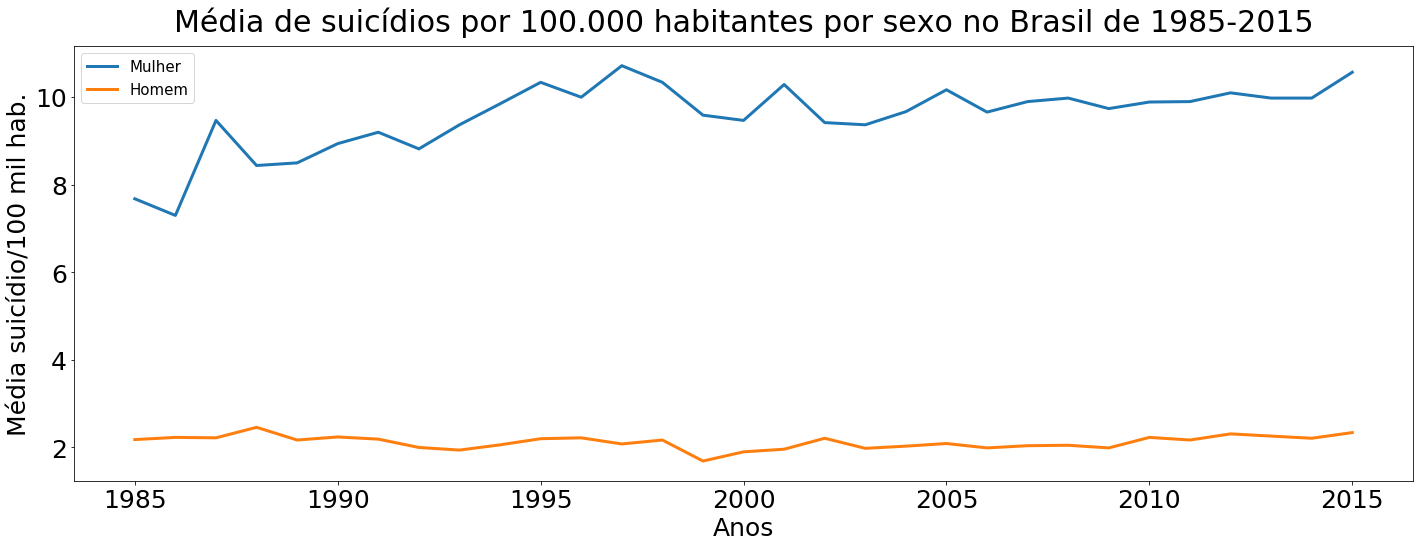

In [16]:
#Criando o gráfico do total de óbitos por idade com a biblioteca seaborn
ax=sns.lineplot(x='year', y='male',data=sexo,linewidth=3)
ax=sns.lineplot(x='year', y='female',data=sexo, linewidth=3)
#Definindo o tamanho da figura
ax.figure.set_size_inches(24,8)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Média de suicídios por 100.000 habitantes por sexo no Brasil de 1985-2015', fontsize=30, pad=15)
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel('Anos',fontsize=25)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel('Média suicídio/100 mil hab.',fontsize=25)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(labelsize = 25)
#Legenda
ax.legend(['Mulher','Homem'],fontsize=15,loc='best')

A média de suicídios por 100.000 habitantes entre homens sempre se manteve maior do que a das mulheres durante o período avaliado. É importante destacar, que essa mortalidade sempre se manteve pelo menos 4 vezes maior durante o período coletado. 

Diversos fatores podem contribuir para os resultados apresentados acima, mas os dados mostram que a faixa etária e o sexo podem ser fatores que contribuem para o aumento dos números de suicídio, necessitando uma análise mais apurada para se confirmar isso a fim de auxiliar na prevenção do suicídio.    